In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('transaction.csv')
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [3]:
country = pd.DataFrame(dataset['Country'].value_counts())
country

,Country
Germany,2269
France,2109
EIRE,1620
Netherlands,634
Spain,539
Belgium,486
Switzerland,434
Portugal,367
Australia,356
Norway,239


In [4]:
temp = dataset.drop_duplicates(subset='InvoiceNo', keep='first')
temp

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
8,549222,23076,383,4/7/2011 10:43,12347,Iceland
14,556201,23171,135,6/9/2011 13:01,12347,Iceland
19,562032,23308,490,8/2/2011 8:48,12347,Iceland
...,...,...,...,...,...,...
10515,559557,22398,948,7/11/2011 10:33,17444,Canada
10529,545579,20723,822,3/4/2011 8:10,17508,Greece
10531,555931,21733,580,6/8/2011 8:31,17828,Malta
10535,543911,21485,469,2/14/2011 12:46,17829,United Arab Emirates


In [5]:
transaction = pd.DataFrame(temp['Country'].value_counts())
transaction

,Country
Germany,377
France,344
EIRE,224
Belgium,84
Netherlands,76
Spain,72
Australia,44
Portugal,43
Switzerland,41
Italy,31


In [6]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

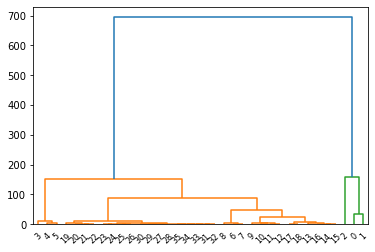

In [7]:
dendrogram = sch.dendrogram(sch.linkage(transaction, method='ward'))
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clusters = model.fit_predict(transaction)

In [8]:
clusters

array([1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
from sklearn.cluster import KMeans

In [10]:
clustering = KMeans(n_clusters=3).fit(transaction)
clusters=clustering.labels_
clusters

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
centroid = clustering.cluster_centers_
centroid

array([[  9.62962963],
       [315.        ],
       [ 60.        ]])

In [12]:
sortedIndex = np.argsort(centroid.sum(axis=1))
zeroArray = np.zeros_like(sortedIndex)
zeroArray[sortedIndex] = np.arange(3)

sortedCentroid =centroid[zeroArray]
sortedCentroid

array([[  9.62962963],
       [ 60.        ],
       [315.        ]])

In [13]:
sortedLabel = zeroArray[clusters]
sortedLabel

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
label_2 = (sortedLabel == 2).nonzero()
countryHigh = transaction.index[label_2]
countryHigh

Index(['Germany', 'France', 'EIRE'], dtype='object')

In [15]:
label_1 = (sortedLabel == 1).nonzero()
countryMid = transaction.index[label_1]
countryMid

Index(['Belgium', 'Netherlands', 'Spain', 'Australia', 'Portugal',
       'Switzerland'],
      dtype='object')

In [16]:
label_0 = (sortedLabel == 0).nonzero()
countryLow = transaction.index[label_0]
countryLow

Index(['Italy', 'Norway', 'Sweden', 'Finland', 'Channel Islands', 'Denmark',
       'Poland', 'Cyprus', 'Japan', 'Austria', 'Unspecified', 'Iceland',
       'Greece', 'USA', 'Israel', 'Singapore', 'Canada', 'European Community',
       'Lithuania', 'Malta', 'United Arab Emirates', 'Czech Republic', 'RSA',
       'Lebanon', 'Saudi Arabia', 'Brazil', 'Bahrain'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt

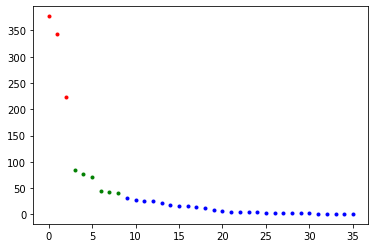

In [18]:
plt.plot(label_2, transaction.iloc[label_2].to_numpy().reshape((1, -1)), 'r.')
plt.plot(label_1, transaction.iloc[label_1].to_numpy().reshape((1, -1)), 'g.')
plt.plot(label_0, transaction.iloc[label_0].to_numpy().reshape((1, -1)), 'b.')
plt.show()